In [1]:
from __future__ import print_function, division
%run ../basics.ipynb

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['show_config']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loading BokehJS ...

Using Theano backend.


In [2]:
df = pd.read_csv('../data/auto_tagging_training_testing_confirmed_tags_2016_09_06.csv')
df['tag'] = df['tag'].apply(lambda x: ' '.join(x.split(' | '))) # exact tags
#df['tag'] = df['all_tag'].apply(lambda x: ' '.join(set([j for i in map(lambda y: y.split('>')[1:], 
#                                                                       x.split(' | ')) for j in i]))) # full tags
display(df.head(2))

print(df.columns)
print(df.count()/len(df)*100)

id  \
0  http://videolectures.net/acml2013_herbrich_rea...   
1  http://videolectures.net/acml2013_lin_cost_sen...   

                                         description  \
0  The last ten years have seen a tremendous grow...   
1  Classification is an important problem in mach...   

                                               title subtitle syllabus  \
0  Distributed, Real-Time Bayesian Learning in On...      NaN      NaN   
1  Cost-sensitive Classification: Algorithms and ...      NaN      NaN   

                               tag  \
0  in_depth machine_learning video   
1  in_depth machine_learning video   

                                             all_tag  fold_num  
0  resource_depth>in_depth | data_science_process...         2  
1  resource_depth>in_depth | data_science_process...         2

Index([u'id', u'description', u'title', u'subtitle', u'syllabus', u'tag',
       u'all_tag', u'fold_num'],
      dtype='object')
id             100.000000
description     83.535109
title          100.000000
subtitle        28.087167
syllabus        11.138015
tag            100.000000
all_tag        100.000000
fold_num       100.000000
dtype: float64


In [3]:
df.head(2)

id  \
0  http://videolectures.net/acml2013_herbrich_rea...   
1  http://videolectures.net/acml2013_lin_cost_sen...   

                                         description  \
0  The last ten years have seen a tremendous grow...   
1  Classification is an important problem in mach...   

                                               title subtitle syllabus  \
0  Distributed, Real-Time Bayesian Learning in On...      NaN      NaN   
1  Cost-sensitive Classification: Algorithms and ...      NaN      NaN   

                               tag  \
0  in_depth machine_learning video   
1  in_depth machine_learning video   

                                             all_tag  fold_num  
0  resource_depth>in_depth | data_science_process...         2  
1  resource_depth>in_depth | data_science_process...         2

In [4]:
def all_text(X):
    if isinstance(X, pd.DataFrame):
        concat_x = pd.Series(index=X.index, data='')
        for i in X.columns:
            concat_x += ' ' + X[i].apply(text_cleanup)
        X = concat_x
    #sns.distplot(X.apply(lambda x: len(x.split())), bins=100)
    return X

In [16]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.6, min_df=5, ngram_range=(1, 2))
text = all_text(df[['title', 'description', 'syllabus']])
#for v in pd.unique(df['venue']):
#    sns.distplot(text[df['venue'] == v].apply(lambda x: len(x.split())))
#    plt.title(v)
#    plt.show()
#text = text[text.apply(lambda x: len(x.split())) >= 100]
tfidf = vectorizer.fit_transform(text.values)
words = vectorizer.get_feature_names()
print(tfidf.shape)

(413, 2038)


v v v v 	Topic #0	v v v v v

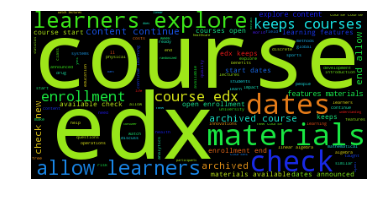

v v v v 	Topic #1	v v v v v

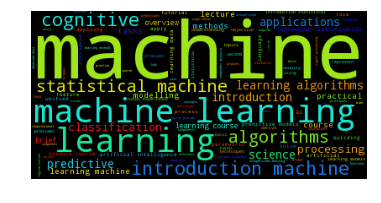

v v v v 	Topic #2	v v v v v

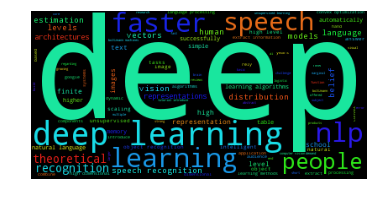

v v v v 	Topic #3	v v v v v

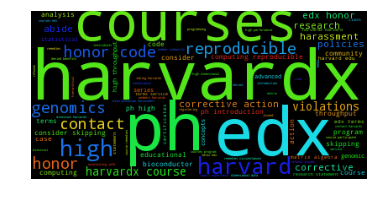

v v v v 	Topic #4	v v v v v

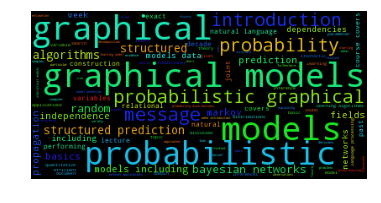

v v v v 	Topic #5	v v v v v

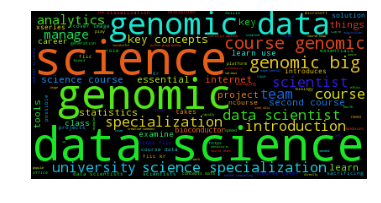

v v v v 	Topic #6	v v v v v

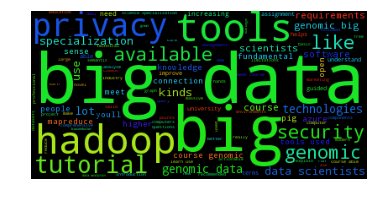

v v v v 	Topic #7	v v v v v

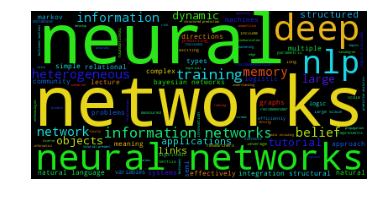

v v v v 	Topic #8	v v v v v

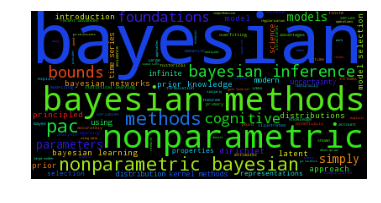

v v v v 	Topic #9	v v v v v

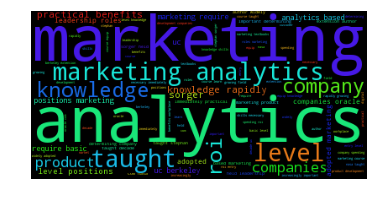

v v v v 	Topic #10	v v v v v

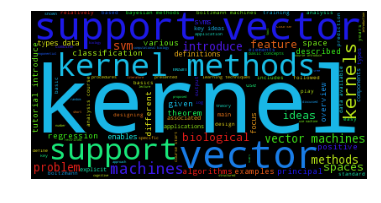

v v v v 	Topic #11	v v v v v

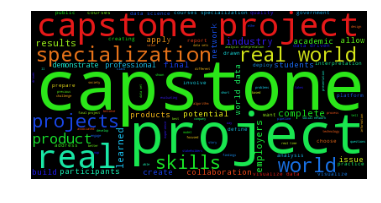

v v v v 	Topic #12	v v v v v

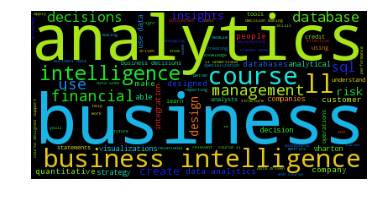

v v v v 	Topic #13	v v v v v

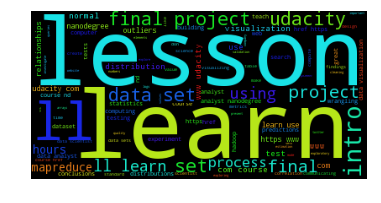

v v v v 	Topic #14	v v v v v

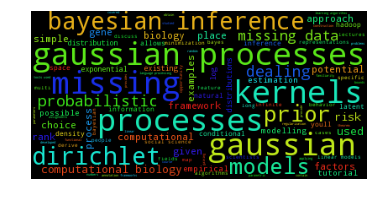

v v v v 	Topic #15	v v v v v

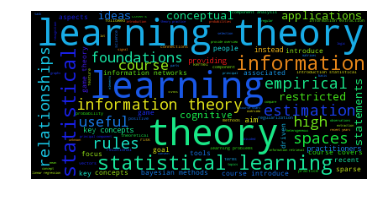

v v v v 	Topic #16	v v v v v

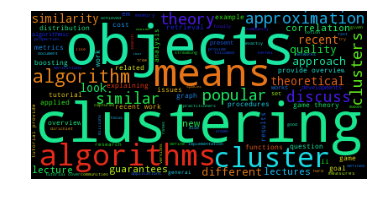

v v v v 	Topic #17	v v v v v

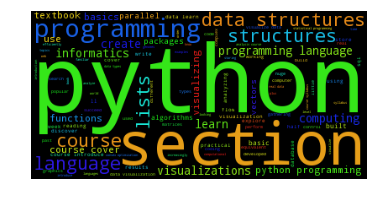

v v v v 	Topic #18	v v v v v

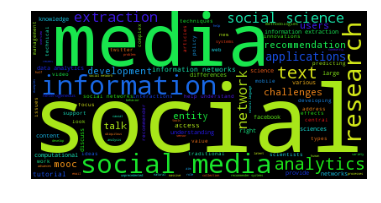

v v v v 	Topic #19	v v v v v

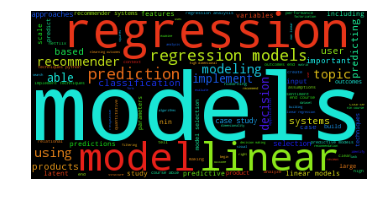

v v v v 	Topic #20	v v v v v

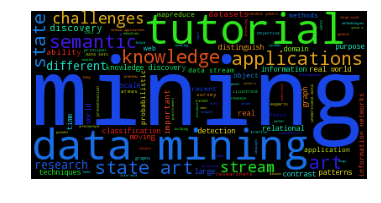

v v v v 	Topic #21	v v v v v

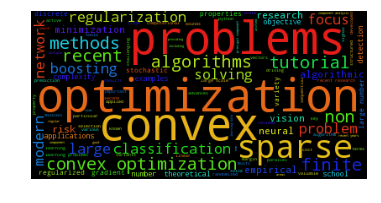

v v v v 	Topic #22	v v v v v

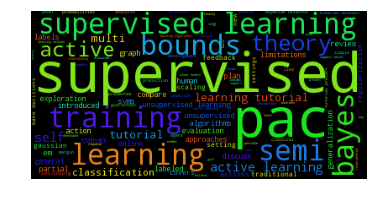

v v v v 	Topic #23	v v v v v

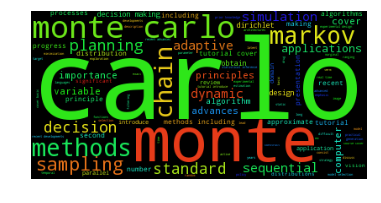

v v v v 	Topic #24	v v v v v

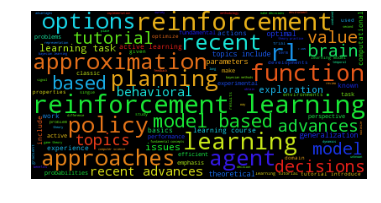

v v v v 	Topic #25	v v v v v

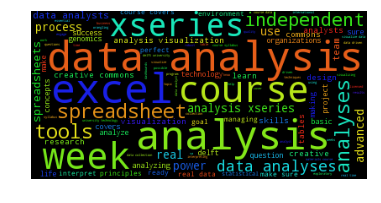

v v v v 	Topic #26	v v v v v

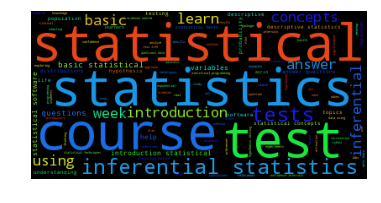

v v v v 	Topic #27	v v v v v

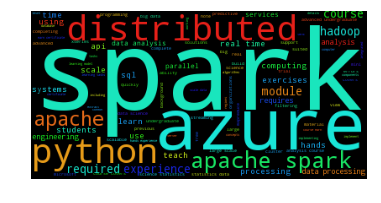

v v v v 	Topic #28	v v v v v

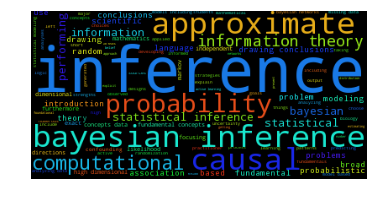

v v v v 	Topic #29	v v v v v

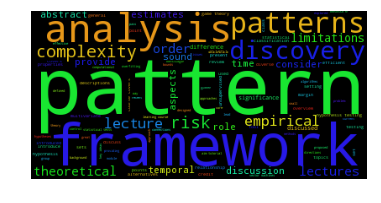

In [17]:
n_topics = 30
n_top_words = 100
nmf = NMF(n_components=n_topics, random_state=1).fit(tfidf)

feature_names = words
topic_dict = dict()
for topic_idx, topic in enumerate(nmf.components_):
    print("v v v v \tTopic #%d\t" % topic_idx, end='v v v v v')
    topic_top_words = [feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]
    topic_top_words_vals = sorted(topic.ravel(), reverse=True)[:n_top_words]
    text_freq = zip(topic_top_words, topic_top_words_vals)
    wordcloud(text_freq)
    topic_top_words = ", ".join(topic_top_words)
    #print(topic_top_words)
    topic_dict[topic_idx] = text_freq

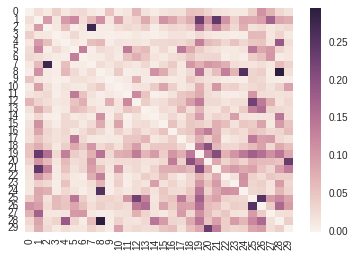

In [18]:
transformed = nmf.transform(tfidf)
df_title_topic = pd.DataFrame(columns=['title'], data=df['title'].values)
df_title_topic['topic id'] = transformed.argmax(axis=1)
plot_topic_coocurrence(transformed)

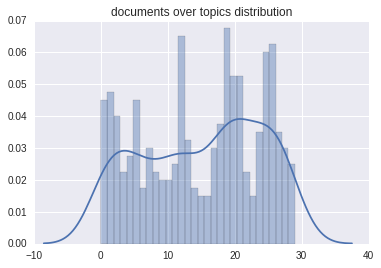

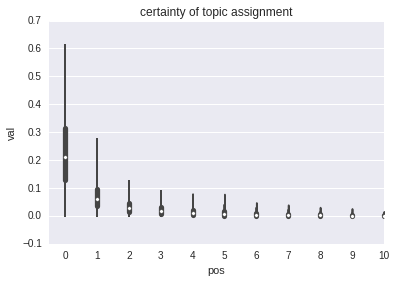

In [19]:
viz_nmf_output(transformed)

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

  0%|          | 0/30 [00:00<?, ?it/s]

('calc cross-entropy prerequisites. input shape:', (30, 2038))


100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


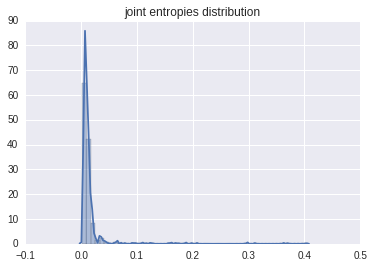

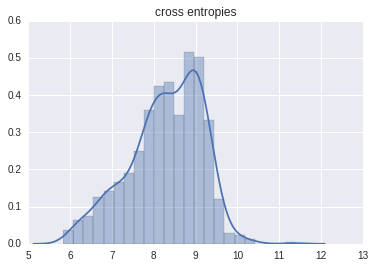

('prereq len:', 179)


t  prereq       val
0  0       6  0.945626
1  0      11  0.176589

In [31]:
%run ../basics.ipynb
method = 'words'
th=.01
if method=='doc':
    # topic x documents
    dependecies = cross_entropy_prereq(transformed.T, th=th)
elif method=='words':
    # topic x words
    dependecies = cross_entropy_prereq(nmf.components_, th=th)
else:
    print('unknown method:', method)

dependecies.head(2)

179
158
rank: 0 cross entropy difference: 2.06277575992


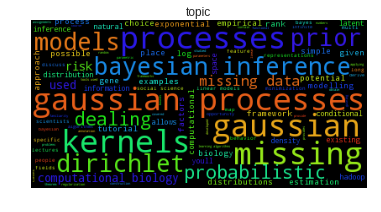

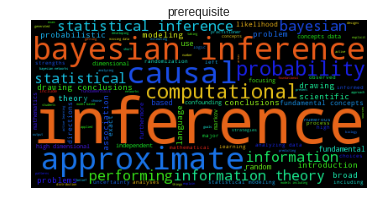

--------------------------------------------------------------------------------
rank: 1 cross entropy difference: 1.96206826145


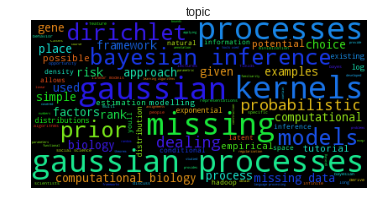

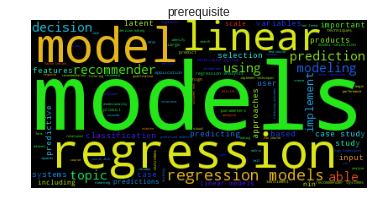

--------------------------------------------------------------------------------
rank: 2 cross entropy difference: 1.89742776461


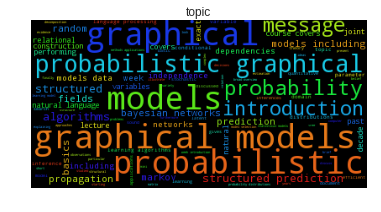

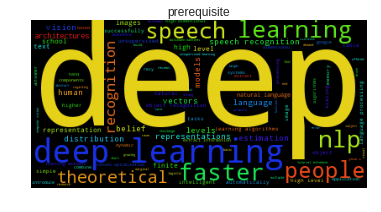

--------------------------------------------------------------------------------
rank: 3 cross entropy difference: 1.89178237297


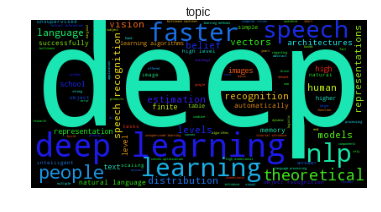

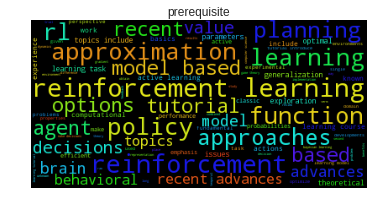

--------------------------------------------------------------------------------
rank: 4 cross entropy difference: 1.87199216124


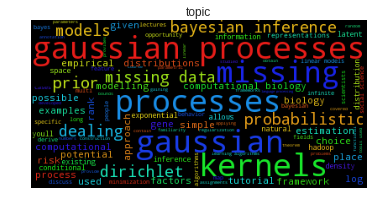

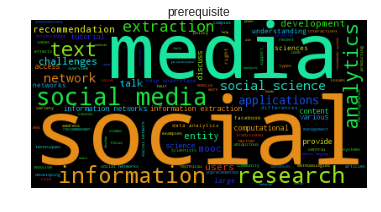

--------------------------------------------------------------------------------
rank: 5 cross entropy difference: 1.84925529857


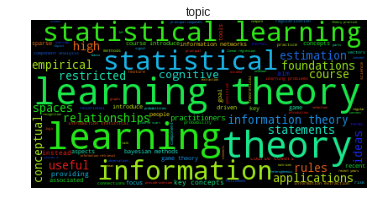

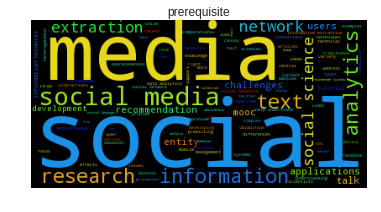

--------------------------------------------------------------------------------
rank: 6 cross entropy difference: 1.75178771926


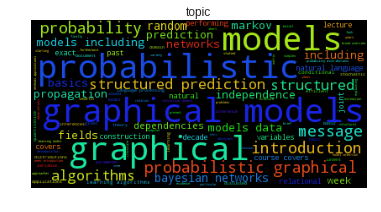

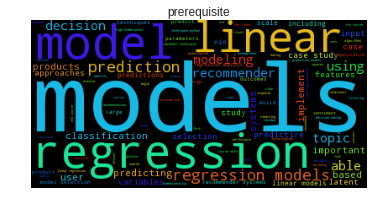

--------------------------------------------------------------------------------
rank: 7 cross entropy difference: 1.55173711215


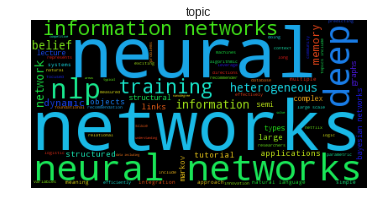

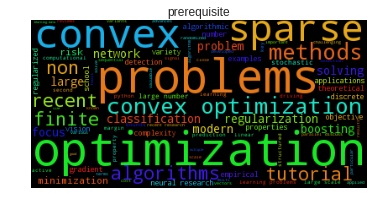

--------------------------------------------------------------------------------
rank: 8 cross entropy difference: 1.52988031723


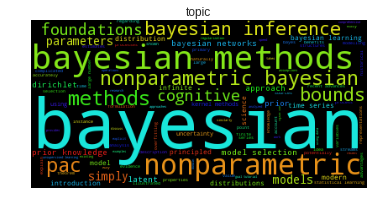

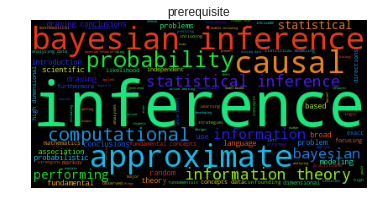

--------------------------------------------------------------------------------
rank: 9 cross entropy difference: 1.46786907518


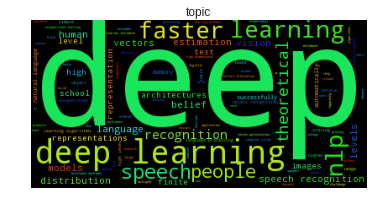

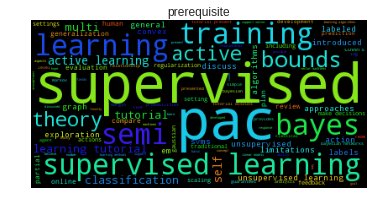

--------------------------------------------------------------------------------


In [32]:
dependecies.sort_values(by='val', ascending=False, inplace=True)

ignored_topics = set([0, 3, 13])
print(len(dependecies))
dependecies = dependecies[dependecies['t'].apply(lambda x: x not in ignored_topics)]
dependecies = dependecies[dependecies['prereq'].apply(lambda x: x not in ignored_topics)]
print(len(dependecies))

rank = 0
for idx, (t_id, prereq_id, val) in dependecies[['t', 'prereq', 'val']].iloc[:10].iterrows():
    print('rank:', rank, 'cross entropy difference:', val)
    rank += 1
    wordcloud(topic_dict[t_id], title='topic')
    wordcloud(topic_dict[prereq_id], title='prerequisite')
    print('-' * 80)

In [ ]:
dependecies['topic'] = dependecies['t'] #.apply(lambda x: topic_dict[x])
dependecies['prerequisite'] = dependecies['prereq'] #.apply(lambda x: topic_dict[x])
display(dependecies.head(2))

pvt = pd.pivot_table(data=dependecies, index='topic', columns='prerequisite', values='val', aggfunc=lambda x: -1. * np.sum(x))
pvt_vals = pvt.fillna(0).values
for i in range(pvt_vals.shape[0]):
    for j in range(pvt_vals.shape[1]):
        if i == j:
            pvt_vals[i,j] = 0
        elif pvt_vals[i, j] > pvt_vals[j, i]:
            pvt_vals[i, j] = 0
pvt[:] = pvt_vals

In [ ]:
pvt.head(2)

In [ ]:
sns.heatmap(pvt)
plt.ylabel('topic id')
plt.xlabel('depentency topic id')
plt.show()

In [ ]:
mean_df = pd.DataFrame(pvt.mean(axis=1))
mean_df['topic'] = map(lambda x: topic_dict[x], mean_df.index)
mean_df.sort_values(by=0)

In [ ]:
topic_dep = pd.DataFrame(columns=['dep'], data=pvt.idxmax(axis=1))
topic_dep['dep val'] = pvt.max(axis=1)
topic_dep.head(2)

In [ ]:
topic_dep.sort_values(by='dep val', ascending=False, inplace=True)
topic_dep['topic'] = map(lambda x: topic_dict[x], topic_dep.index)
topic_dep['topic dep.'] = map(lambda x: np.nan if x not in topic_dict else topic_dict[x], topic_dep['dep'])
prereq_list = list()
for idx, (dep_val, topic, dep, dep_id) in topic_dep[['dep val', 'topic', 'topic dep.', 'dep']].iterrows():
    if dep_val > .01:
        print('-'*80)
        print(dep_val)
        print('topic id:', idx, 'prereq topic id:', dep_id)
        prereq_list.append((idx, dep_id))
        wordcloud(topic)
        print('^^^^^^^')
        wordcloud(dep)

In [ ]:
%run basics.ipynb
tmp = df_title_topic.copy()
tmp['title'] = tmp['title'].apply(lambda x: x.replace(' - VideoLectures.NET', ""))
pg = get_prereq_graph(tmp.values, prereq_list)

In [ ]:
dep_df = dependecies.groupby(by=('topic', 'dependency'),as_index=False).mean().sort_values(by='diff2top')
dep_df['topic'] = map(lambda x: topic_dict[x], dep_df['topic'])
dep_df['dependency'] = map(lambda x: topic_dict[x], dep_df['dependency'])
dep_df